# Тема доется с трудом. Последние три задания ещё буду доделывать. 

## Временные ряды 3

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import itertools

import numpy as np
import pandas as pd 
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from random import random

from sklearn.metrics import mean_squared_error
import os

***

__1. Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по 1 месяцу.__

In [39]:
Path_Energy = '../lesson3/my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])
data_month = data.resample('M').mean()

***

__2. Подберите параметры модели SARIMAX для этого ряда.__

In [58]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

p = [0] 
d = [0,1]
q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [59]:
warnings.filterwarnings("ignore") # отключает предупреждения
result_best = {'param':0, 'param_seasonal': 0, 'AIC': 1000000}
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_month['PJME_MW'].values[:-24],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            if result_best['AIC'] > results.aic:
                result_best['AIC'] = results.aic
                result_best['param'] = param
                result_best['param_seasonal'] = param_seasonal
        except:
            continue
print('ARIMA{}x{}3 - AIC:{}'.format(result_best['param'], result_best['param_seasonal'], result_best['AIC'])) 

ARIMA(0, 1, 2)x(0, 1, 2, 12)3 - AIC:2405.512431330322


In [60]:
pdq = [0, 1, 2]
seasonal_pdq = [0, 1, 2 ,12] 

In [61]:
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(data_month['PJME_MW'].values[:-24],order=pdq,
                                seasonal_order=seasonal_pdq ,
                                enforce_stationarity= False ,
                                enforce_invertibility=False)
results = mod.fit()
print('SARIMAX{}x{} - AIC:{}'.format(pdq, seasonal_pdq, results.aic))

SARIMAX[0, 1, 2]x[0, 1, 2, 12] - AIC:2405.512431330322


In [62]:
print(results.summary().tables[0],results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  176
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -1197.756
Date:                            Sun, 12 Jul 2020   AIC                           2405.512
Time:                                    20:27:05   BIC                           2420.076
Sample:                                         0   HQIC                          2411.431
                                            - 176                                         
Covariance Type:                              opg                                         
========================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

***

__3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.__

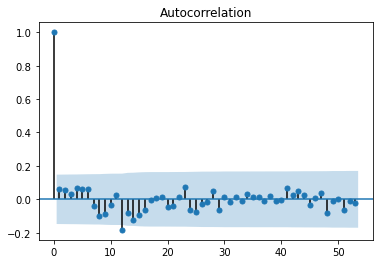

In [63]:
sm.graphics.tsa.plot_acf(results.resid, lags=53)
plt.show()

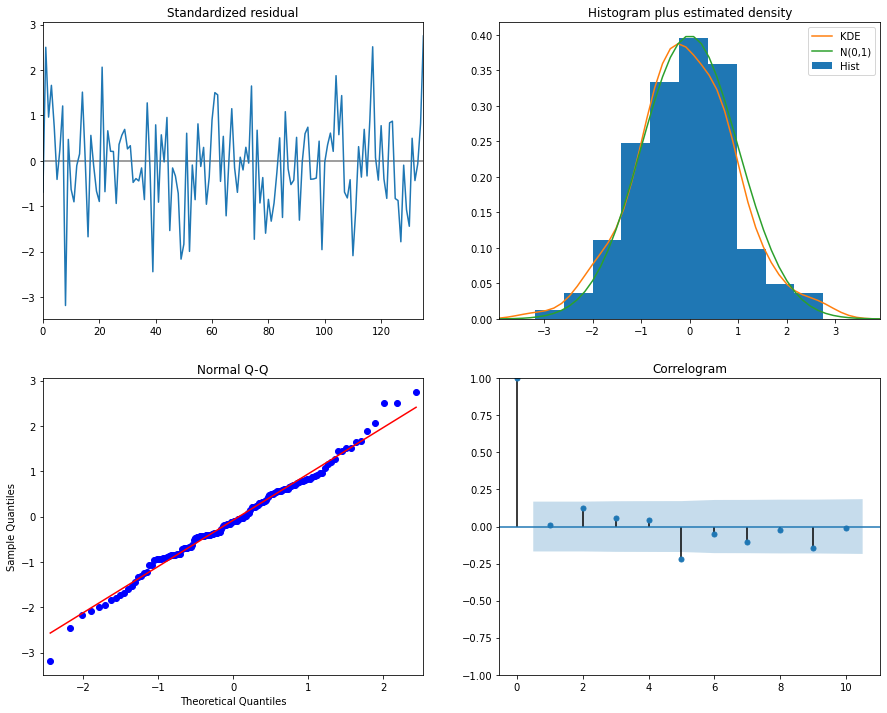

In [64]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()


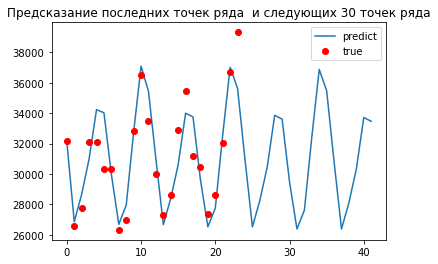

In [67]:
pred_dynamic = results.forecast(42)    #делаем предсказание на 3 точки от текущего конца ряда

plt.plot(pred_dynamic, label='predict' )
#Отобразим истинный значения 
plt.plot(data_month['PJME_MW'].values[-24:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 30 точек ряда')
plt.legend()

plt.show()

Вывод: кажется что модель на месячных данных показывает лучший результат

__4. Постройте ACF, PACF и модель ARIMA для СOVID_19  (по любой стране кроме Китая на дневных графиках )__

In [68]:
data = pd.read_csv('../lesson3/covid_19_data.csv', index_col=[0], parse_dates=[0])

In [79]:
covid_jamaica_all = data.loc[data['Country/Region'] == 'Jamaica']
covid_jamaica = covid_jamaica_all.drop(columns = ['Province/State', 'Country/Region','Last Update'], axis=1)
covid_jamaica = covid_jamaica.set_index('ObservationDate')

In [80]:
covid_jamaica.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
03/11/2020,1.0,0.0,0.0
03/12/2020,2.0,0.0,0.0
03/13/2020,8.0,0.0,0.0
03/14/2020,8.0,0.0,0.0
03/15/2020,10.0,0.0,0.0


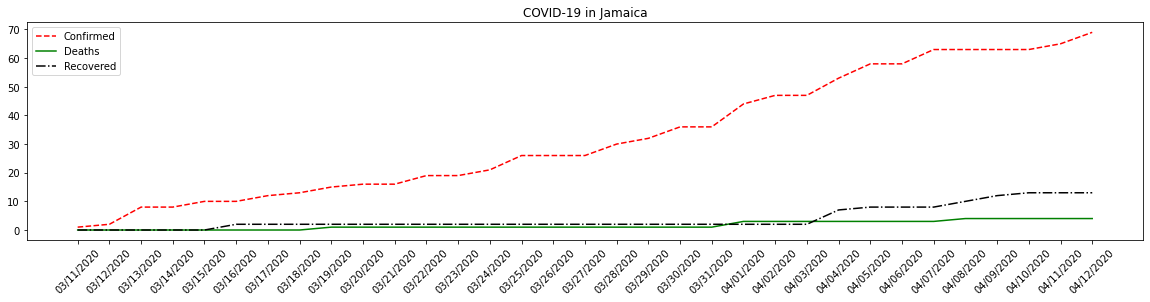

In [83]:
plt.figure(figsize =(20,4))
plt.plot( covid_jamaica.index[:5*7*4*3], covid_jamaica['Confirmed'].values[:5*7*4*3], '--r',label='Confirmed' )
plt.plot( covid_jamaica.index[:5*7*4*3], covid_jamaica['Deaths'].values[:5*7*4*3], 'g',label='Deaths'  )
plt.plot( covid_jamaica.index[:5*7*4*3], covid_jamaica['Recovered'].values[:5*7*4*3], '-.k',label='Recovered'  )
plt.title('COVID-19 in Jamaica' )
plt.xticks(rotation=45)
plt.legend()
plt.show()

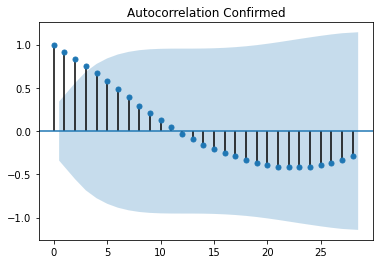

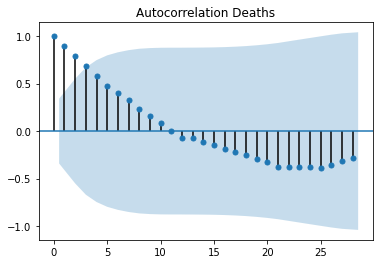

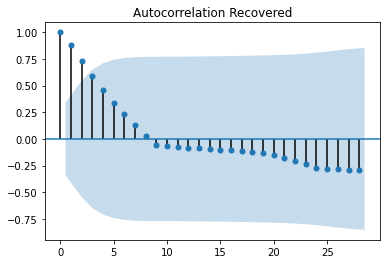

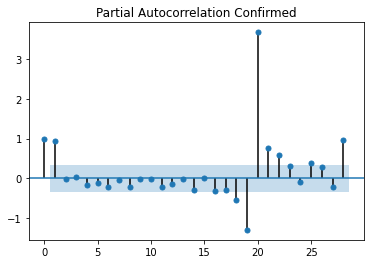

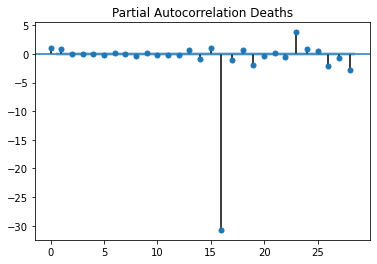

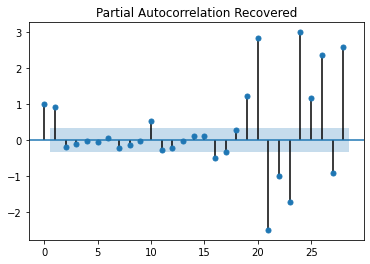

In [98]:
lags =7*4
sm.graphics.tsa.plot_acf(covid_jamaica['Confirmed'].values, lags=lags, title='Autocorrelation Confirmed')
sm.graphics.tsa.plot_acf(covid_jamaica['Deaths'].values, lags=lags, title='Autocorrelation Deaths')
sm.graphics.tsa.plot_acf(covid_jamaica['Recovered'].values, lags=lags, title='Autocorrelation Recovered')
plt.show()

sm.graphics.tsa.plot_pacf(covid_jamaica['Confirmed'].values, lags=lags, title='Partial Autocorrelation Confirmed')
sm.graphics.tsa.plot_pacf(covid_jamaica['Deaths'].values, lags=lags, title='Partial Autocorrelation Deaths')
sm.graphics.tsa.plot_pacf(covid_jamaica['Recovered'].values, lags=lags, title='Partial Autocorrelation Recovered')
plt.show()

In [107]:
covid_jamaica_confirmed.head()

,Confirmed
ObservationDate,
03/11/2020,1.0
03/12/2020,2.0
03/13/2020,8.0
03/14/2020,8.0
03/15/2020,10.0


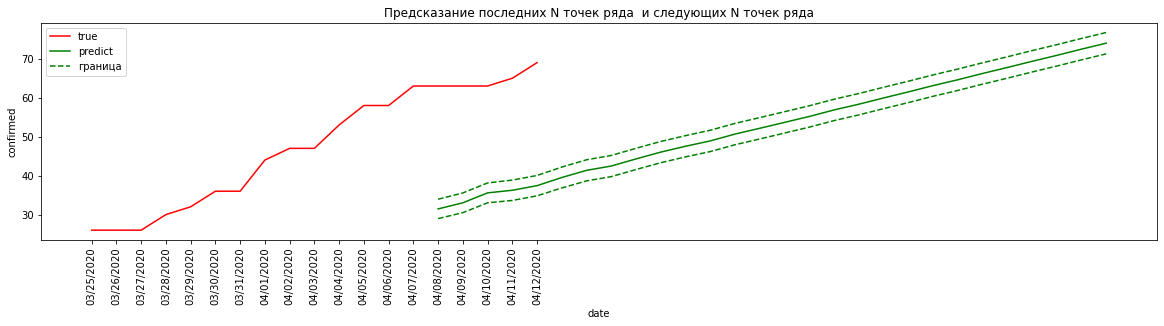

In [134]:
covid_jamaica_confirmed = covid_jamaica.drop(columns=['Recovered','Deaths'], axis=1)
N=14

model = ARIMA(covid_jamaica_confirmed[:-N], order=(7, 1,2))
model_fit = model.fit(disp=False)
y_p = model_fit.predict(len(covid_jamaica_confirmed[:-N]), len(covid_jamaica_confirmed[:-N]), typ='levels')
y_f = model_fit.forecast(2*N)
plt.figure(figsize =(20,4))
plt.plot(covid_jamaica_confirmed[-5-N:],'r',label ='true')
plt.xticks(rotation=90)
#plt.plot(y_p,'*b',label ='model')
plt.plot(np.arange(2*N)+N,y_f[0],'g',label ='predict')
plt.plot(np.arange(2*N)+N,y_f[2][:,1],'--g', label = 'граница')
plt.plot(np.arange(2*N)+N,y_f[2][:,0],'--g')
plt.xlabel('date')
plt.ylabel('confirmed')
plt.title('Предсказание последних N точек ряда  и следующих N точек ряда')
plt.legend()
plt.show()

***

__5. Оцените результат моделирования__
Всё очень плохо.

__6. Сделайте предположение о моделях, которые лучше работают с техниками регрессии  на основе AR I MA.__